# Visualize replicate reproducibility metrics
plots adapted from *https://github.com/jump-cellpainting/workflow_demo_analysis/blob/main/analysis_Broad/0.percent_scores.ipynb*

In [1]:
from pathlib import Path
import random
import numpy as np
import pandas as pd
from ast import literal_eval #to handle the list

import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as gg

In [2]:
plt.style.use("seaborn-ticks")
plt.rcParams["image.cmap"] = "Set1"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)
%matplotlib inline

In [3]:
results_folder = 'results/'
figures_folder = 'figures/'

In [4]:
corr_replicating_df = pd.read_csv(Path(results_folder + "percent_replicating.tsv"), sep='\t', 
                                  converters={"Null_corr":literal_eval, "Replicate_corr":literal_eval})
corr_replicating_df.Null_corr = [[float(a) for a in x] for x in corr_replicating_df.Null_corr]
corr_replicating_df.Replicate_corr = [[float(a) for a in x] for x in corr_replicating_df.Replicate_corr]
corr_replicating_df

,Experiment,Null_corr,Percent_Replicating,Replicate_corr,Value_95
0,ES2 median plates,"[0.2523085533945586, 0.42322004591539725, 0.42...",0.589,"[0.44224767550363364, 0.4942376886927228, 0.65...",0.601117
1,ES2 weighted plates,"[-0.2945455735806768, 0.10753305566003812, 0.0...",0.580,"[0.013759888953960818, -0.027412484635187966, ...",0.374430
2,HCC44 median plates,"[0.5644308042547357, 0.5282627613284376, 0.456...",0.580,"[0.5574613047489727, 0.6366146436788489, 0.540...",0.670640
3,HCC44 weighted plates,"[-0.11242979221447824, -0.0705403134335615, 0....",0.652,"[0.8615749882569973, -0.20607070824532253, 0.7...",0.562109
4,A549 median plates,"[0.4752067082200891, 0.6165796904194725, 0.337...",0.321,"[0.4643473318583918, 0.5403371678862309, 0.392...",0.636353
5,A549 weighted plates,"[-0.05360314123578215, 0.24097173498398666, 0....",0.473,"[-0.07078088005077657, 0.20287258450516932, 0....",0.524279


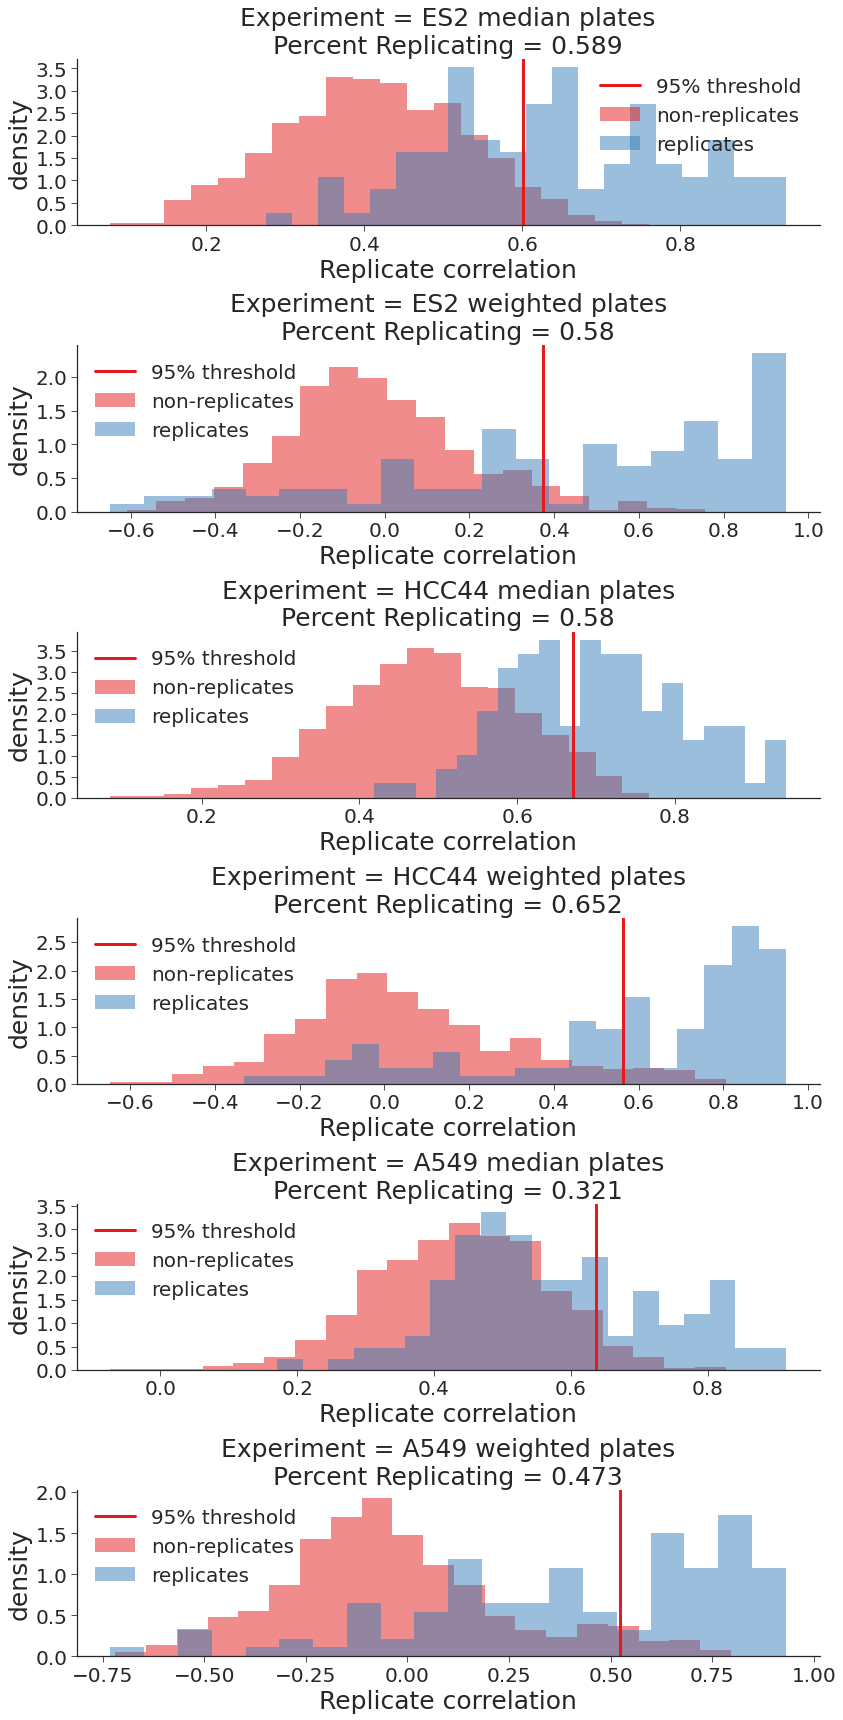

In [5]:
n_experiments = len(corr_replicating_df)

plt.rcParams['figure.facecolor'] = 'white' # Enabling this makes the figure axes and labels visible in PyCharm Dracula theme
plt.figure(figsize=[12, n_experiments*4])

for i in range(n_experiments):
    plt.subplot(n_experiments, 1, i+1)
    plt.hist(corr_replicating_df.loc[i,'Null_corr'], label='non-replicates', density=True, bins=20, alpha=0.5)
    plt.hist(corr_replicating_df.loc[i,'Replicate_corr'], label='replicates', density=True, bins=20, alpha=0.5)
    plt.axvline(corr_replicating_df.loc[i,'Value_95'], linewidth=3, label='95% threshold')
    plt.legend(fontsize=20)
    plt.title(
        f"Experiment = {corr_replicating_df.loc[i,'Experiment']}\n" +
        f"Percent Replicating = {corr_replicating_df.loc[i,'Percent_Replicating']}",
        fontsize=25
    )
    plt.ylabel("density", fontsize=25)
    plt.xlabel("Replicate correlation", fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    sns.despine()
plt.tight_layout()
plt.savefig(Path(figures_folder + 'percent_replicating.png'))

In [6]:
corr_matching_df = pd.read_csv(Path(results_folder + "percent_matching.tsv"), sep='\t',
                                converters={"Matching_corr":literal_eval, "Null_Matching":literal_eval})
corr_matching_df.Matching_corr = [[float(a) for a in x] for x in corr_matching_df.Matching_corr]
corr_matching_df.Null_Matching = [[float(a) for a in x] for x in corr_matching_df.Null_Matching]

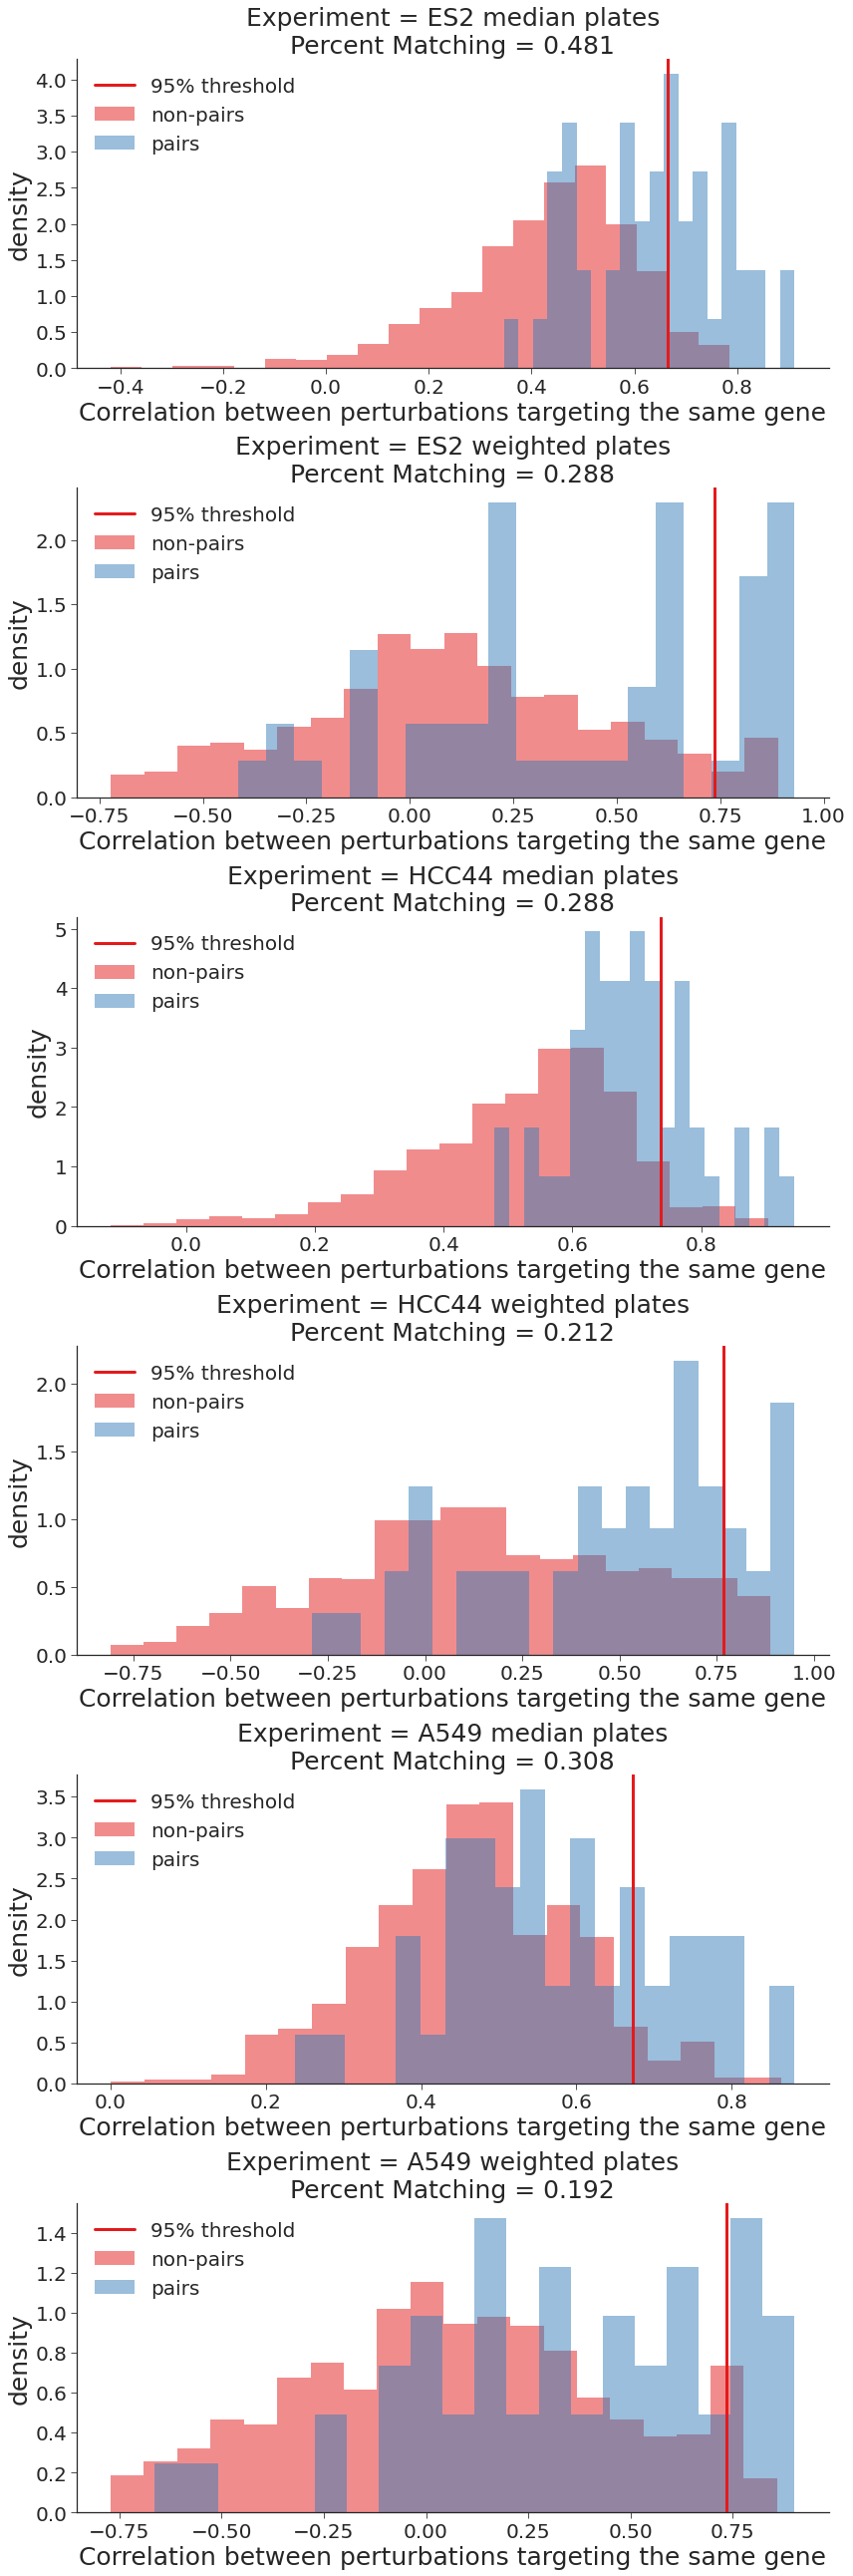

In [7]:

n_experiments = len(corr_matching_df)

plt.rcParams['figure.facecolor'] = 'white' # Enabling this makes the figure axes and labels visible in PyCharm Dracula theme
plt.figure(figsize=[12, n_experiments*6])

for i in range(n_experiments):
    plt.subplot(n_experiments, 1, i+1)
    plt.hist(corr_matching_df.loc[i,'Null_Matching'], label='non-pairs', density=True, bins=20, alpha=0.5)
    plt.hist(corr_matching_df.loc[i,'Matching_corr'], label='pairs', density=True, bins=20, alpha=0.5)
    plt.axvline(corr_matching_df.loc[i,'Value_95'], linewidth=3, label='95% threshold')
    plt.legend(fontsize=20)
    plt.title(
        f"Experiment = {corr_matching_df.loc[i,'Experiment']}\n" +
        f"Percent Matching = {corr_matching_df.loc[i,'Percent_Matching']}",
        fontsize=25
    )
    plt.ylabel("density", fontsize=25)
    plt.xlabel("Correlation between perturbations targeting the same gene", fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    sns.despine()
plt.tight_layout()
plt.savefig(Path(figures_folder + 'percent_matching.png'))